# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url 

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f15c52f574cb8c970c3f2fee8962f38d'

In [4]:
city_data = []

for   i, city in enumerate(cities):
    city_url = url + "&q=" + city
    print(f"{i} out of {len(cities)}",end="\r")
    try:
        city_weather = requests.get(city_url).json()
        
        
        
        city_latitude = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        max_temp = city_weather["main"]["temp_max"]
        cloudness= city_weather["clouds"]["all"]
        
        humidity = city_weather["main"]["humidity"]
        
        wind_speed = city_weather["wind"]["speed"]
        
        country =  city_weather["sys"]["country"]
        date = city_weather["dt"]
        
        data = {
           "city": city,
            "latitude": city_latitude,
            "longitude": city_longitude,
            "Max_Temp" : max_temp,
            "humidity": humidity,
            "cloudness": cloudness,
            "wind speed" : wind_speed,
            "country" : country,
            "Date" : date
        }
        
        city_data.append(data)
    

    
    except Exception as e:
        
        print(e, f"city not found. skipping {city}")
        

'coord' city not found. skipping mys shmidta
'coord' city not found. skipping karauzyak
'coord' city not found. skipping nizhneyansk
'coord' city not found. skipping grand river south east
'coord' city not found. skipping barentsburg
'coord' city not found. skipping taolanaro
'coord' city not found. skipping saleaula
'coord' city not found. skipping belushya guba
'coord' city not found. skipping meyungs
'coord' city not found. skipping chom bung
'coord' city not found. skipping jinchengjiang
'coord' city not found. skipping tumannyy
'coord' city not found. skipping sentyabrskiy
'coord' city not found. skipping amderma
'coord' city not found. skipping samalaeulu
'coord' city not found. skipping himora
'coord' city not found. skipping tsihombe
'coord' city not found. skipping malwan
'coord' city not found. skipping illoqqortoormiut
'coord' city not found. skipping nguiu
'coord' city not found. skipping wa
'coord' city not found. skipping krasnoyarsk-45
'coord' city not found. skipping va

In [5]:
city_df = pd.DataFrame(city_data)
city_df.head()

,city,latitude,longitude,Max_Temp,humidity,cloudness,wind speed,country,Date
0,punta arenas,-53.1500,-70.9167,41.11,81,40,20.71,CL,1659350685
1,iqaluit,63.7506,-68.5145,47.93,87,75,2.30,CA,1659350685
2,yablonovo,50.8523,37.3574,79.95,39,42,12.24,RU,1659350685
3,bitung,1.4451,125.1824,81.45,81,49,3.62,ID,1659350685
4,carutapera,-1.1950,-46.0200,77.40,92,63,6.64,BR,1659350685


In [6]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        549 non-null    object 
 1   latitude    549 non-null    float64
 2   longitude   549 non-null    float64
 3   Max_Temp    549 non-null    float64
 4   humidity    549 non-null    int64  
 5   cloudness   549 non-null    int64  
 6   wind speed  549 non-null    float64
 7   country     549 non-null    object 
 8   Date        549 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.7+ KB


In [7]:
limit = 100
column_name = 'humidity'

count = (city_df['humidity'] > 100 ).sum()
count

0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
city_df = pd.DataFrame(city_data)
city_df.head()

,city,latitude,longitude,Max_Temp,humidity,cloudness,wind speed,country,Date
0,punta arenas,-53.1500,-70.9167,41.11,81,40,20.71,CL,1659350685
1,iqaluit,63.7506,-68.5145,47.93,87,75,2.30,CA,1659350685
2,yablonovo,50.8523,37.3574,79.95,39,42,12.24,RU,1659350685
3,bitung,1.4451,125.1824,81.45,81,49,3.62,ID,1659350685
4,carutapera,-1.1950,-46.0200,77.40,92,63,6.64,BR,1659350685


In [8]:
city_df.describe()

,latitude,longitude,Max_Temp,humidity,cloudness,wind speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.105565,16.325288,70.370219,70.149362,56.335155,8.172313,1.659351e+09
std,34.037585,90.439100,14.639578,22.252194,39.840657,5.771164,4.906591e+01
min,-54.800000,-179.166700,30.240000,1.000000,0.000000,0.000000,1.659350e+09
25%,-8.257800,-59.516700,59.810000,56.000000,14.000000,3.890000,1.659351e+09
50%,22.338400,17.828600,73.450000,77.000000,69.000000,6.910000,1.659351e+09
75%,48.995700,96.150000,80.260000,87.000000,99.000000,11.010000,1.659351e+09
max,78.218600,179.316700,107.580000,100.000000,100.000000,33.490000,1.659351e+09


In [61]:
# Convert data strings to float
pd.to_numeric(city_df["cloudness"]).astype(float)
pd.to_numeric(city_df["humidity"]).astype(float)
pd.to_numeric(city_df["latitude"]).astype(float)
pd.to_numeric(city_df["longitude"]).astype(float)
pd.to_numeric(city_df["Max_Temp"]).astype(float)
pd.to_numeric(city_df["wind speed"]).astype(float)
city_df


,city,latitude,longitude,Max_Temp,humidity,cloudness,wind speed,country,Date
0,punta arenas,-53.1500,-70.9167,41.11,81,40,20.71,CL,1659350685
1,iqaluit,63.7506,-68.5145,47.93,87,75,2.30,CA,1659350685
2,yablonovo,50.8523,37.3574,79.95,39,42,12.24,RU,1659350685
3,bitung,1.4451,125.1824,81.45,81,49,3.62,ID,1659350685
4,carutapera,-1.1950,-46.0200,77.40,92,63,6.64,BR,1659350685
...,...,...,...,...,...,...,...,...,...
544,port-cartier,50.0334,-66.8654,62.74,85,82,3.98,CA,1659350741
545,hof,50.3167,11.9167,73.45,68,75,9.22,DE,1659350706
546,marataizes,-21.0433,-40.8244,66.90,78,0,3.27,BR,1659350742
547,zuwarah,32.9312,12.0820,87.08,54,0,9.33,LY,1659350742


In [62]:
#Export DataFrame to CSV File
city_df.to_csv("city_df.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
#  Get the indices of cities that have humidity over 100%.
limit = 100
column_name = 'humidity'

count = (city_df['humidity'] > 100 ).sum()
count

0

In [49]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_df.head()

,city,latitude,longitude,Max_Temp,humidity,cloudness,wind speed,country,Date
0,punta arenas,-53.1500,-70.9167,41.11,81,40,20.71,CL,1659350685
1,iqaluit,63.7506,-68.5145,47.93,87,75,2.30,CA,1659350685
2,yablonovo,50.8523,37.3574,79.95,39,42,12.24,RU,1659350685
3,bitung,1.4451,125.1824,81.45,81,49,3.62,ID,1659350685
4,carutapera,-1.1950,-46.0200,77.40,92,63,6.64,BR,1659350685


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot shows that Temperature decreases as you move away from Equator


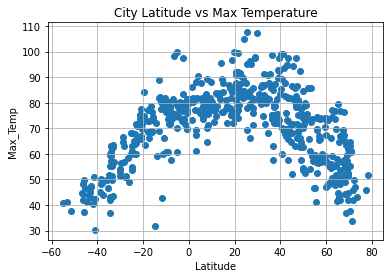

In [54]:
print('This plot shows that Temperature decreases as you move away from Equator')

x_values = city_df['latitude']
y_values = city_df['Max_Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
plt.grid()
plt.show()



## Latitude vs. Humidity Plot

This plot indicates that there is no real pattern that the association between Humidity and Latitude is following


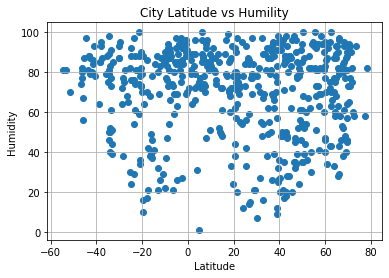

In [55]:
print('This plot indicates that there is no real pattern that the association between Humidity and Latitude is following')

x_values = city_df['latitude']
y_values = city_df['humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humility')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

This plot indicates that there is no real pattern that can the relationship between Cloudiness and Latitude


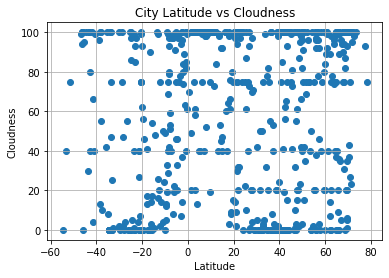

In [56]:
print('This plot indicates that there is no real pattern that can the relationship between Cloudiness and Latitude')

x_values = city_df['latitude']
y_values = city_df['cloudness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudness')
plt.xlabel('Latitude')
plt.ylabel('Cloudness')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

This plot indicates that there is no real pattern that can the relationship between Wind Speed and Latitude


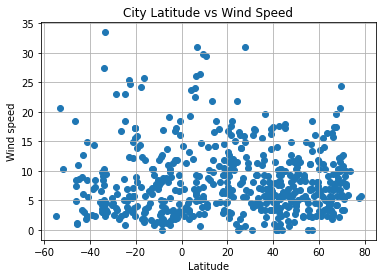

In [57]:
print('This plot indicates that there is no real pattern that can the relationship between Wind Speed and Latitude')

x_values = city_df['latitude']
y_values = city_df['wind speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
from scipy import stats

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_df = city_df.loc[pd.to_numeric(city_df["latitude"]).astype(float) >= 0, :]
southern_city_df = city_df.loc[pd.to_numeric(city_df["latitude"]).astype(float) < 0, :]


Regression line equation is: y = -0.45x + 90.89
The r-squared is: -0.6432295499033303
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


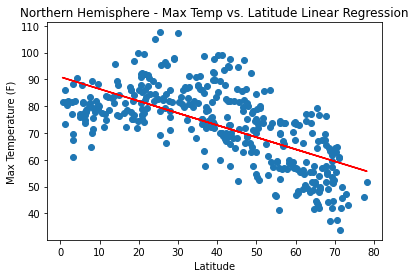

In [39]:
x_values = pd.to_numeric(northern_city_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_city_df['Max_Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.82x + 82.22
The r-squared is: 0.8258703609721205
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


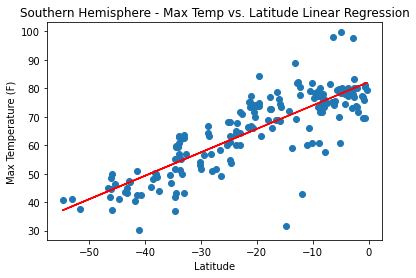

In [40]:
x_values = pd.to_numeric(southern_city_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_city_df['Max_Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 70.44
The r-squared is: -0.025623033658205317
The regression does not display any form of a correlation between the data sets.


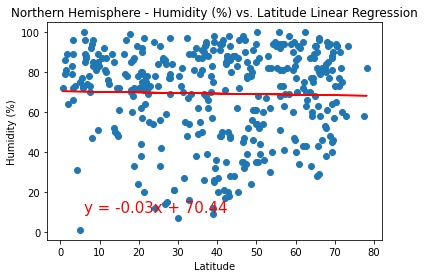

In [51]:
x_values = pd.to_numeric(northern_city_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_city_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display any form of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.01x + 71.6
The r-squared is: -0.008809180197308326
The regression does not display much of a correlation between the data sets.


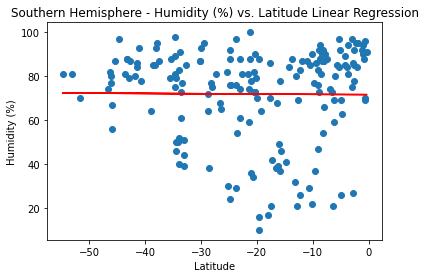

In [42]:
x_values = pd.to_numeric(southern_city_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_city_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.14x + 65.6
The r-squared is: -0.0728156769307934
The regression does not display much of a correlation between the data sets.


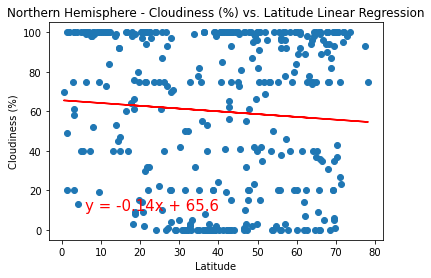

In [43]:
x_values = pd.to_numeric(northern_city_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_city_df['cloudness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.28x + 54.68
The r-squared is: 0.09948499231858335
The regression does not display much of a correlation between the data sets.


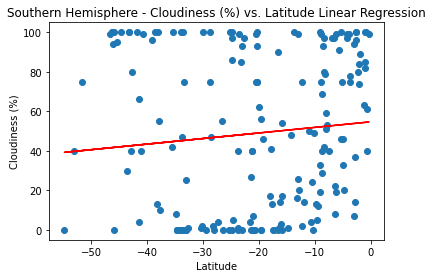

In [44]:
x_values = pd.to_numeric(southern_city_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_city_df['cloudness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 10.07
The r-squared is: -0.15265115868495777
The regression does not display much of a correlation between the data sets.


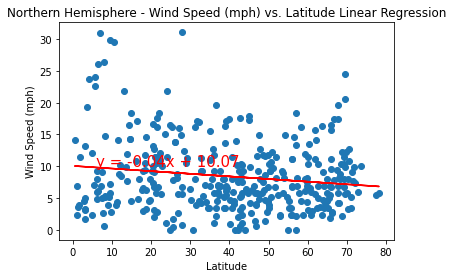

In [45]:
x_values = pd.to_numeric(northern_city_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_city_df['wind speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.02x + 7.24
The r-squared is: -0.04882139406487782
The regression does not display much of a correlation between the data sets.


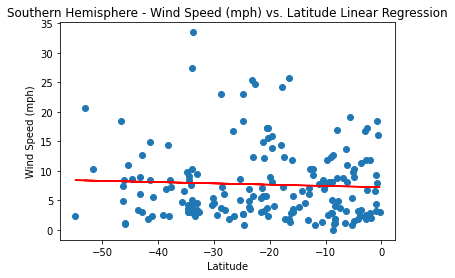

In [46]:
x_values = pd.to_numeric(southern_city_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_city_df['wind speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()